In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
import os

from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import datasets

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Импорт данных
https://www.kaggle.com/alxmamaev/flowers-recognition

In [6]:
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [18]:
images_dict = {'daisy':[], 'dandelion':[], 'rose':[], 'sunflower':[], 'tulip':[]}
labels_dict = {'daisy':[], 'dandelion':[], 'rose':[], 'sunflower':[], 'tulip':[]}
i=0

for name in class_names:
    directory = 'D:\\datasets\\flowers\\' + name + '\\'
    entries = os.listdir(directory)
    print(name,':', i, 'len =', len(entries))
    for entry in entries:
        print(entry)
        image = Image.open('D:\\datasets\\flowers\\' + name + '\\' + entry).resize((224,224))
        data = np.asarray(image)
        images_dict[name].append(data)
        labels_dict[name].append([i])

    labels_dict[name] = np.asarray(labels_dict[name])
    images_dict[name] = np.asarray(images_dict[name])
    print(images_dict[name].shape)
    print('\n')
    i+=1

daisy : 0 len = 764
100080576_f52e8ee070_n.jpg
10140303196_b88d3d6cec.jpg
10172379554_b296050f82_n.jpg
10172567486_2748826a8b.jpg
10172636503_21bededa75_n.jpg
102841525_bd6628ae3c.jpg
10300722094_28fa978807_n.jpg
1031799732_e7f4008c03.jpg
10391248763_1d16681106_n.jpg
10437754174_22ec990b77_m.jpg
10437770546_8bb6f7bdd3_m.jpg
10437929963_bc13eebe0c.jpg
10466290366_cc72e33532.jpg
10466558316_a7198b87e2.jpg
10555749515_13a12a026e.jpg
10555815624_dc211569b0.jpg
10555826524_423eb8bf71_n.jpg
10559679065_50d2b16f6d.jpg
105806915_a9c13e2106_n.jpg
10712722853_5632165b04.jpg
107592979_aaa9cdfe78_m.jpg
10770585085_4742b9dac3_n.jpg
10841136265_af473efc60.jpg
10993710036_2033222c91.jpg
10993818044_4c19b86c82.jpg
10994032453_ac7f8d9e2e.jpg
11023214096_b5b39fab08.jpg
11023272144_fce94401f2_m.jpg
11023277956_8980d53169_m.jpg
11124324295_503f3a0804.jpg
1140299375_3aa7024466.jpg
11439894966_dca877f0cd.jpg
1150395827_6f94a5c6e4_n.jpg
11642632_1e7627a2cc.jpg
11834945233_a53b7a92ac_m.jpg
11870378973_2ec1919

34590677231_0ed33ccd55_n.jpg
34591991761_16fc5c9c00_n.jpg
34602180741_cf2f671ba5_n.jpg
34611565966_9de274f987_n.jpg
34613530216_26cf037012_n.jpg
3463313493_9497aa47e5_n.jpg
34637394046_f85541735d_n.jpg
34637970155_a2b917077c_n.jpg
34638378196_216d5bbc2e_n.jpg
34643914016_2e659d6e82_n.jpg
34652819496_0b6f758986_n.jpg
34658035045_7782e95b50_n.jpg
34661399476_9ea7e2fd53_n.jpg
34664107325_701d5c6f08_n.jpg
34665595995_13f76d5b60_n.jpg
34670512115_af22cce24d_n.jpg
34682895116_88ef018e83_n.jpg
3468498624_d082f99e98.jpg
34693373736_9ce6d9e1c3_n.jpg
34695914906_961f92ffcd_n.jpg
34696729796_190b1dfdf1_n.jpg
34696730126_056ffea63c_n.jpg
34696730346_5f0c131e59_n.jpg
34701078235_4a770d14a1_n.jpg
34701198765_54aa641d7a_n.jpg
34718882165_68cdc9def9_n.jpg
34720703615_bdf1335d8b_n.jpg
34727863665_b00ac77266_n.jpg
34729724865_787c98299d_n.jpg
34733243845_29f1c30634_n.jpg
3474942718_c418dae6f1.jpg
3475870145_685a19116d.jpg
3483303007_42e3f90da7.jpg
3491933306_43cfe2cfbe.jpg
3494265422_9dba8f2191_n.jpg
35

909609509_a05ccb8127.jpg
9120905231_329598304e.jpg
9146733107_98b15d3892_m.jpg
9158041313_7a6a102f7a_n.jpg
9161647994_e39b65cb9c_n.jpg
9175280426_40ecc395b8_m.jpg
9180706736_092d43088c.jpg
9204730092_a7f2182347.jpg
9221345475_67735dbf4f_n.jpg
9225336602_e6c392f941_n.jpg
9242705328_eee8402a8d.jpg
9244082319_b1f7e2d8b0_n.jpg
9286947622_4822f4fc21.jpg
9299302012_958c70564c_n.jpg
9310226774_d1b8f5d9c9.jpg
9321854387_5f77c926cb_n.jpg
9345273630_af3550031d.jpg
9346508462_f0af3163f4.jpg
9350942387_5b1d043c26_n.jpg
9467543719_c4800becbb_m.jpg
9489270024_1b05f08492_m.jpg
9496209717_25a6ebdab6_m.jpg
9515186037_3be48fe68f.jpg
9529916092_de70623523_n.jpg
9593034725_0062f0d24e_n.jpg
9595857626_979c45e5bf_n.jpg
9611923744_013b29e4da_n.jpg
9922116524_ab4a2533fe_n.jpg
99306615_739eb94b9e_m.jpg
(764, 224, 224, 3)


dandelion : 1 len = 1052
10043234166_e6dd915111_n.jpg
10200780773_c6051a7d71_n.jpg
10294487385_92a0676c7d_m.jpg
10437652486_aa86c14985.jpg
10443973_aeb97513fc_m.jpg
10477378514_9ffbcec4cf_m.

KeyboardInterrupt: 

## Изучение данных

**Размер**

In [8]:
images = np.vstack((images_dict['daisy'], images_dict['dandelion'], 
                    images_dict['rose'], images_dict['sunflower'], images_dict['tulip']))
images.shape

(4317, 224, 224, 3)

In [9]:
labels = np.vstack((labels_dict['daisy'], labels_dict['dandelion'], 
                    labels_dict['rose'], labels_dict['sunflower'], labels_dict['tulip']))
labels.shape

(4317, 1)

**Уникальные значения**

In [10]:
uniq = np.unique(labels)
uniq

array([0, 1, 2, 3, 4])

**Масштабирование**

In [8]:
images = images / 255.0

### Примеры изображений

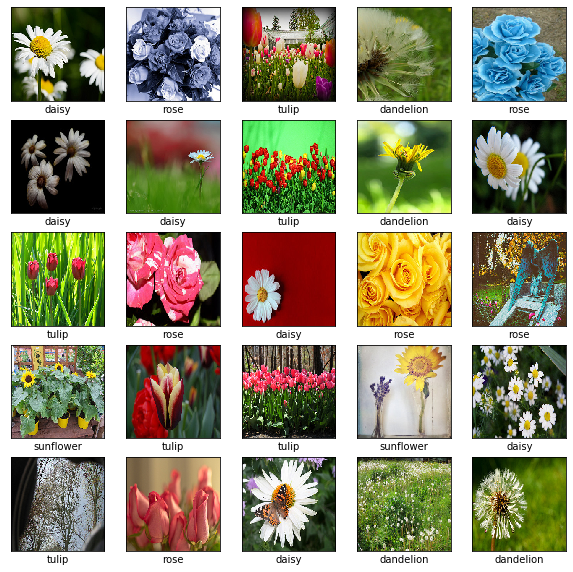

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    n = np.random.randint(images.shape[0])
    plt.imshow(images[n], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[n][0]])
plt.show()


### Функции и классы

In [37]:
class CreateModel():
    def __init__(self, input_layer, output_layer, name='Model'):
        self.input_layer = input_layer
        self.output_layer = output_layer
        self.model = Model(inputs=input_layer, outputs=output, name=name)
    
    def compile_model(self, loss, optimizer='adam', metrics=['accuracy'], summary = True):
        self.model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
        if(summary):
            self.model.summary()
        

In [10]:
def plot_accuracy(history):
    fig, ax = plt.subplots(figsize=(10,7))

    ax.plot(history.history['accuracy'], color='hotpink', label='accuracy')
    ax.plot(history.history['val_accuracy'], color='slateblue', label='val_accuracy')

    ax.legend(loc = 'center right', fontsize=14)
    plt.xlabel('Шаг', fontsize=18)

    plt.title('Точность', fontsize=18)
    plt.tick_params(labelsize=14)
    plt.show()
    
def plot_loss(history):
    fig, ax = plt.subplots(figsize=(10,7))

    ax.plot(history.history['loss'], color='turquoise', label='loss')
    ax.plot(history.history['val_loss'], color='dodgerblue', label='val_loss')

    ax.legend(loc = 'center right', fontsize=14)
    plt.xlabel('Шаг', fontsize=18)

    plt.title('Потери', fontsize=18)
    plt.tick_params(labelsize=14)
    plt.show()

In [11]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(3))
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


## Создание модели

**Создание слоев**

In [12]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, random_state=1)

In [13]:
shape = train_images.shape[1:]

**Tensorflow CNN example**

In [14]:
input_layer = Input(shape=shape)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_layer)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)

output = Dense(len(uniq))(x)

**Компиляция**

In [15]:
modelTF = CreateModel(input_layer, output, name='Tensorflow_CNN_example')
modelTF.compile_model(loss = SparseCategoricalCrossentropy(from_logits = True))

Model: "Tensorflow_CNN_example"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056) 

### Обучение

In [16]:
history = modelTF.model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
81/81 [==============================] - 26s 112ms/step - loss: 1.5192 - accuracy: 0.3538 - val_loss: 1.1270 - val_accuracy: 0.5278
Epoch 2/10
81/81 [==============================] - 7s 92ms/step - loss: 1.0870 - accuracy: 0.5608 - val_loss: 1.0235 - val_accuracy: 0.5910loss: 1.0863 -  - ETA: 0s - loss: 1.0933 - 
Epoch 3/10
81/81 [==============================] - 8s 93ms/step - loss: 0.9237 - accuracy: 0.6574 - val_loss: 1.0895 - val_accuracy: 0.5679
Epoch 4/10
81/81 [==============================] - 8s 95ms/step - loss: 0.6828 - accuracy: 0.7574 - val_loss: 1.0883 - val_accuracy: 0.6312
Epoch 5/10
81/81 [==============================] - 7s 93ms/step - loss: 0.3861 - accuracy: 0.8718 - val_loss: 1.2642 - val_accuracy: 0.6096
Epoch 6/10
81/81 [==============================] - 7s 92ms/step - loss: 0.1909 - accuracy: 0.9413 - val_loss: 1.4563 - val_accuracy: 0.6358
Epoch 7/10
81/81 [==============================] - 7s 93ms/step - loss: 0.0941 - accuracy: 0.9703 - val_loss

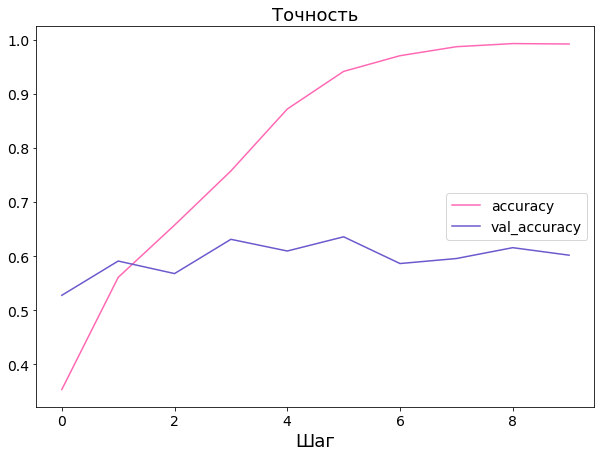

In [17]:
plot_accuracy(history)

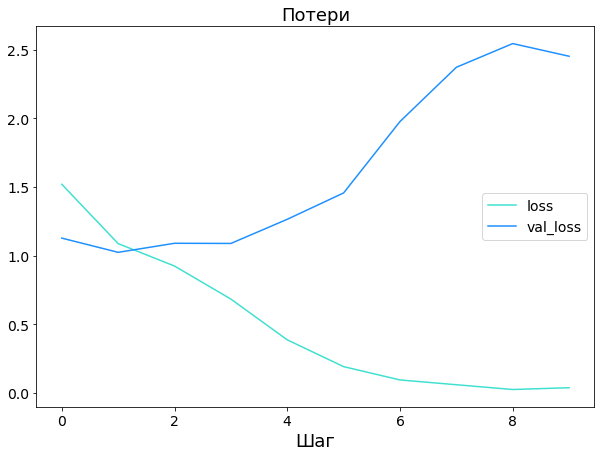

In [18]:
plot_loss(history)

### Тестирование

In [41]:
test_loss, test_acc = modelTF.model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

NameError: name 'modelTF' is not defined

### AlexNet (2012)

In [24]:
input_layer = Input(shape=shape)

x = Conv2D(filters=48, kernel_size=(11,11), activation='relu')(input_layer)
x = MaxPool2D(pool_size=(3,3))(x)
x = Conv2D(filters=128, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(3,3))(x)
x = Conv2D(filters=192, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=192, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(3,3))(x)

x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dense(2048, activation='relu')(x)

output = Dense(len(uniq), activation='softmax')(x)

In [25]:
modelAlex = CreateModel(input_layer, output, name='AlexNet')
modelAlex.compile_model(loss = SparseCategoricalCrossentropy())

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 214, 214, 48)      17472     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 71, 48)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 67, 67, 128)       153728    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 192)       221376    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 192)       3319

In [26]:
history = modelAlex.model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
81/81 [==============================] - 21s 188ms/step - loss: 1.5918 - accuracy: 0.2437 - val_loss: 1.5762 - val_accuracy: 0.2685
Epoch 2/10
81/81 [==============================] - 12s 154ms/step - loss: 1.4140 - accuracy: 0.3700 - val_loss: 1.1651 - val_accuracy: 0.5077
Epoch 3/10
81/81 [==============================] - 12s 150ms/step - loss: 1.3041 - accuracy: 0.4434 - val_loss: 1.1208 - val_accuracy: 0.5309
Epoch 4/10
81/81 [==============================] - 12s 150ms/step - loss: 1.1204 - accuracy: 0.5396 - val_loss: 1.1411 - val_accuracy: 0.5571
Epoch 5/10
81/81 [==============================] - 12s 149ms/step - loss: 1.0414 - accuracy: 0.5863 - val_loss: 1.0565 - val_accuracy: 0.5756
Epoch 6/10
81/81 [==============================] - 12s 148ms/step - loss: 0.9484 - accuracy: 0.6331 - val_loss: 1.0030 - val_accuracy: 0.6157
Epoch 7/10
81/81 [==============================] - 12s 151ms/step - loss: 0.9032 - accuracy: 0.6493 - val_loss: 0.9540 - val_accuracy: 0.6219

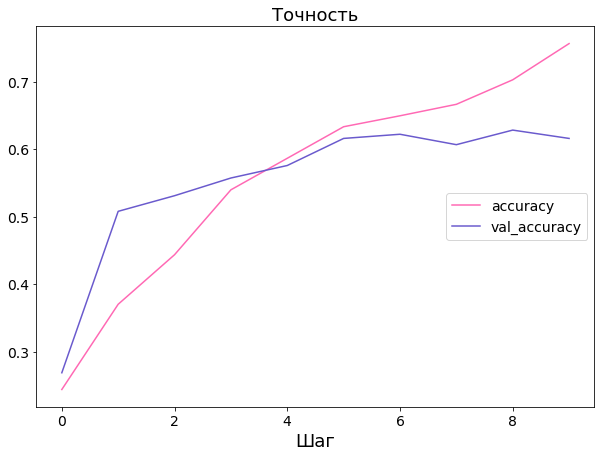

In [27]:
plot_accuracy(history)

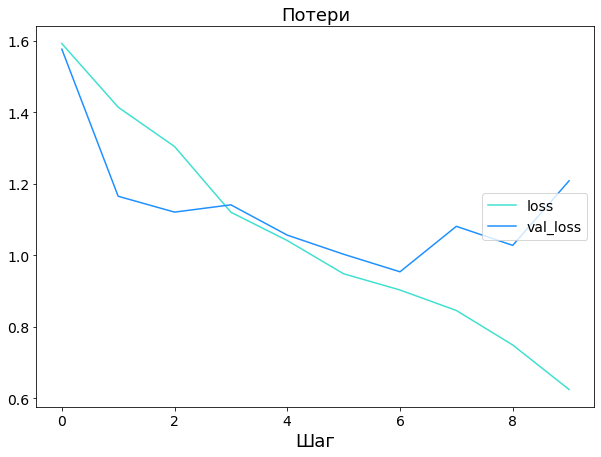

In [28]:
plot_loss(history)

## Overfitting solutions

In [14]:
input_layer = Input(shape=shape)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_layer)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)

output = Dense(len(uniq), activation='softmax')(x)

In [15]:
model = CreateModel(input_layer, output, name='Model')
model.compile_model(loss = SparseCategoricalCrossentropy())

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0     

In [16]:
history = model.model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
81/81 [==============================] - 28s 133ms/step - loss: 1.4264 - accuracy: 0.4295 - val_loss: 1.0451 - val_accuracy: 0.5679
Epoch 2/10
81/81 [==============================] - 6s 70ms/step - loss: 1.0695 - accuracy: 0.5829 - val_loss: 1.0129 - val_accuracy: 0.5910
Epoch 3/10
81/81 [==============================] - 6s 70ms/step - loss: 0.8917 - accuracy: 0.6589 - val_loss: 0.9065 - val_accuracy: 0.6512
Epoch 4/10
81/81 [==============================] - 6s 70ms/step - loss: 0.6746 - accuracy: 0.7420 - val_loss: 1.0921 - val_accuracy: 0.6435
Epoch 5/10
81/81 [==============================] - 6s 70ms/step - loss: 0.4747 - accuracy: 0.8235 - val_loss: 1.1417 - val_accuracy: 0.6219
Epoch 6/10
81/81 [==============================] - 6s 69ms/step - loss: 0.2769 - accuracy: 0.9034 - val_loss: 1.4525 - val_accuracy: 0.6543
Epoch 7/10
81/81 [==============================] - 6s 70ms/step - loss: 0.1541 - accuracy: 0.9525 - val_loss: 1.6354 - val_accuracy: 0.6466
Epoch 8/10


**Переобученная модель выглядит так:**

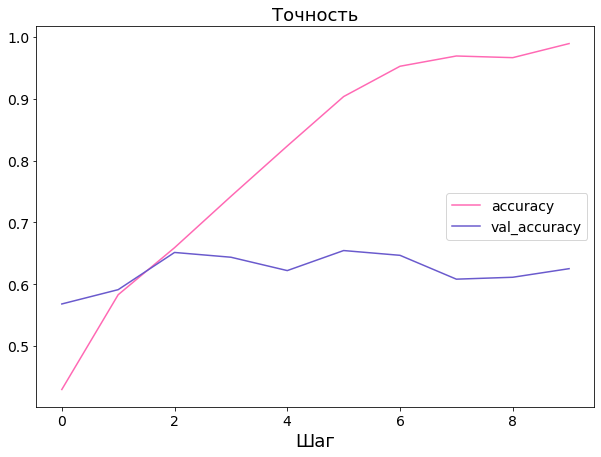

In [17]:
plot_accuracy(history)

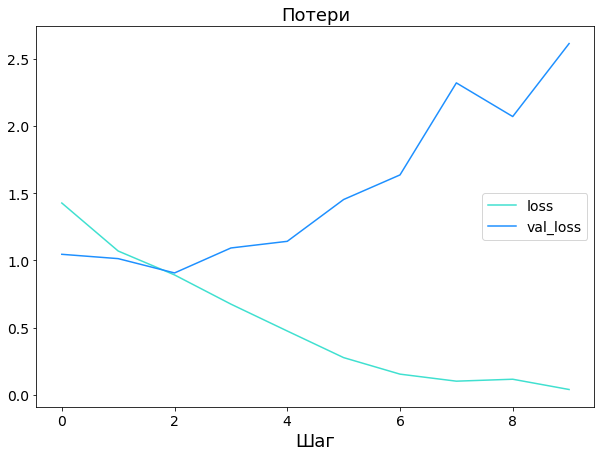

In [18]:
plot_loss(history)

In [42]:
test_loss, test_acc = model.model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

34/34 - 2s - loss: 1.7767 - accuracy: 0.5944

Test accuracy: 0.5944444537162781


### 1. Regularization

**lambda = 0.01**

In [20]:
l = 0.01

input_layer = Input(shape=shape)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
           kernel_regularizer=tf.keras.regularizers.l2(l=l))(input_layer)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
           kernel_regularizer=tf.keras.regularizers.l2(l=l))(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu', 
           kernel_regularizer=tf.keras.regularizers.l2(l=l))(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)

output = Dense(len(uniq), activation='softmax')(x)

In [21]:
modelR = CreateModel(input_layer, output, name='Model')
modelR.compile_model(loss = SparseCategoricalCrossentropy())

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0     

In [22]:
history = modelR.model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
81/81 [==============================] - 6s 75ms/step - loss: 2.1955 - accuracy: 0.3882 - val_loss: 1.5939 - val_accuracy: 0.5108
Epoch 2/10
81/81 [==============================] - 6s 71ms/step - loss: 1.4797 - accuracy: 0.5462 - val_loss: 1.4218 - val_accuracy: 0.5077
Epoch 3/10
81/81 [==============================] - 6s 70ms/step - loss: 1.2786 - accuracy: 0.6087 - val_loss: 1.1897 - val_accuracy: 0.6420
Epoch 4/10
81/81 [==============================] - 6s 71ms/step - loss: 1.1193 - accuracy: 0.6450 - val_loss: 1.1586 - val_accuracy: 0.6204
Epoch 5/10
81/81 [==============================] - 6s 71ms/step - loss: 0.9765 - accuracy: 0.7049 - val_loss: 1.1430 - val_accuracy: 0.6157
Epoch 6/10
81/81 [==============================] - 6s 71ms/step - loss: 0.8325 - accuracy: 0.7524 - val_loss: 1.2002 - val_accuracy: 0.6312
Epoch 7/10
81/81 [==============================] - 6s 71ms/step - loss: 0.6423 - accuracy: 0.8331 - val_loss: 1.2294 - val_accuracy: 0.6219
Epoch 8/10
81

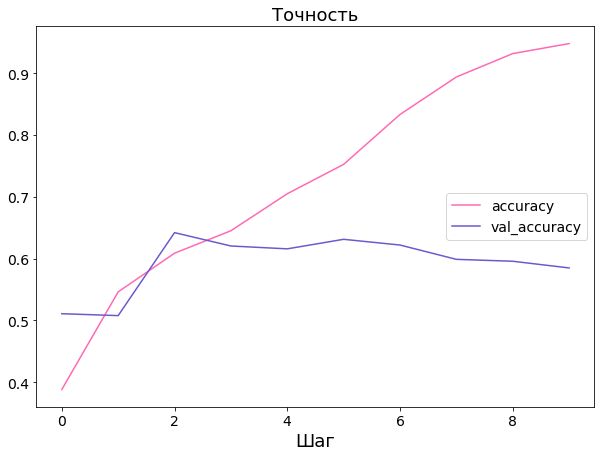

In [23]:
plot_accuracy(history)

In [ ]:
test_loss, test_acc = modelR.model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

**lambda = 0.1**

In [38]:
l = 0.1

input_layer = Input(shape=shape)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
           kernel_regularizer=tf.keras.regularizers.l2(l=l))(input_layer)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
           kernel_regularizer=tf.keras.regularizers.l2(l=l))(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu', 
           kernel_regularizer=tf.keras.regularizers.l2(l=l))(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)

output = Dense(len(uniq), activation='softmax')(x)

In [39]:
modelR = CreateModel(input_layer, output, name='Model')
modelR.compile_model(loss = SparseCategoricalCrossentropy(), summary = False)

Epoch 1/10
81/81 [==============================] - 7s 75ms/step - loss: 6.3500 - accuracy: 0.3967 - val_loss: 2.7697 - val_accuracy: 0.5031
Epoch 2/10
81/81 [==============================] - 6s 70ms/step - loss: 2.2449 - accuracy: 0.5129 - val_loss: 1.8489 - val_accuracy: 0.5170
Epoch 3/10
81/81 [==============================] - 6s 77ms/step - loss: 1.6303 - accuracy: 0.5523 - val_loss: 1.4975 - val_accuracy: 0.5494
Epoch 4/10
81/81 [==============================] - 6s 70ms/step - loss: 1.3675 - accuracy: 0.5929 - val_loss: 1.3027 - val_accuracy: 0.5972
Epoch 5/10
81/81 [==============================] - 6s 70ms/step - loss: 1.2277 - accuracy: 0.6246 - val_loss: 1.2498 - val_accuracy: 0.5664
Epoch 6/10
81/81 [==============================] - 6s 70ms/step - loss: 1.1390 - accuracy: 0.6489 - val_loss: 1.1962 - val_accuracy: 0.5988
Epoch 7/10
81/81 [==============================] - 6s 70ms/step - loss: 1.0584 - accuracy: 0.6678 - val_loss: 1.1707 - val_accuracy: 0.6235
Epoch 8/10
81

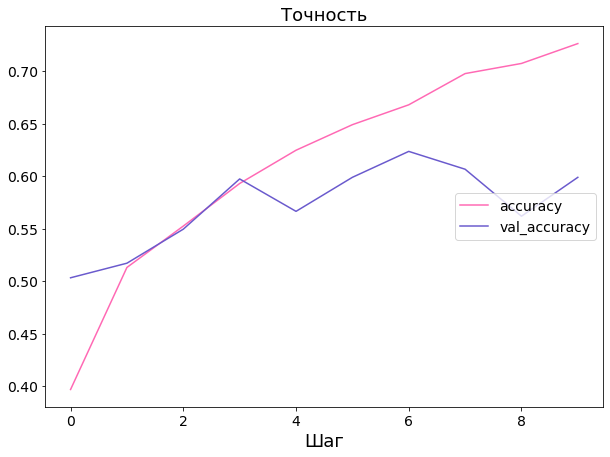

In [40]:
history = modelR.model.fit(train_images, train_labels, epochs=10, validation_split=0.2)
plot_accuracy(history)

In [43]:
test_loss, test_acc = modelR.model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

34/34 - 1s - loss: 1.2447 - accuracy: 0.5972

Test accuracy: 0.5972222089767456


### 2. Dropout

In [24]:
input_layer = Input(shape=shape)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_layer)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.4)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.4)(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)

output = Dense(len(uniq), activation='softmax')(x)

In [25]:
modelD = CreateModel(input_layer, output, name='Model')
modelD.compile_model(loss = SparseCategoricalCrossentropy())

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0     

In [26]:
history = modelD.model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
81/81 [==============================] - 7s 83ms/step - loss: 1.9482 - accuracy: 0.2437 - val_loss: 1.5008 - val_accuracy: 0.3349
Epoch 2/10
81/81 [==============================] - 6s 79ms/step - loss: 1.3129 - accuracy: 0.4226 - val_loss: 1.1517 - val_accuracy: 0.5108
Epoch 3/10
81/81 [==============================] - 6s 78ms/step - loss: 1.1463 - accuracy: 0.5207 - val_loss: 1.0914 - val_accuracy: 0.5093
Epoch 4/10
81/81 [==============================] - 6s 78ms/step - loss: 1.0474 - accuracy: 0.5848 - val_loss: 1.0831 - val_accuracy: 0.5448
Epoch 5/10
81/81 [==============================] - 6s 79ms/step - loss: 0.9858 - accuracy: 0.6153 - val_loss: 1.0367 - val_accuracy: 0.5694
Epoch 6/10
81/81 [==============================] - 6s 77ms/step - loss: 0.8745 - accuracy: 0.6493 - val_loss: 0.9741 - val_accuracy: 0.5910
Epoch 7/10
81/81 [==============================] - 6s 76ms/step - loss: 0.7710 - accuracy: 0.7003 - val_loss: 0.9860 - val_accuracy: 0.5957
Epoch 8/10
81

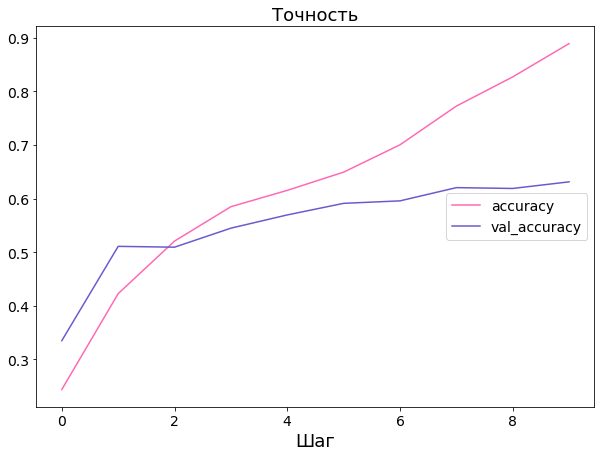

In [27]:
plot_accuracy(history)

In [44]:
test_loss, test_acc = modelD.model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

34/34 - 1s - loss: 1.2433 - accuracy: 0.6306

Test accuracy: 0.6305555701255798


## Batch Normalization

In [33]:
input_layer = Input(shape=shape)

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_layer)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)

output = Dense(len(uniq), activation='softmax')(x)

In [34]:
modelB = CreateModel(input_layer, output, name='Model')
modelB.compile_model(loss = SparseCategoricalCrossentropy())

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0     

In [35]:
history = modelB.model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
81/81 [==============================] - 9s 100ms/step - loss: 6.4876 - accuracy: 0.3631 - val_loss: 17.1609 - val_accuracy: 0.2623
Epoch 2/10
81/81 [==============================] - 8s 93ms/step - loss: 1.4720 - accuracy: 0.4226 - val_loss: 7.5790 - val_accuracy: 0.2500
Epoch 3/10
81/81 [==============================] - 7s 93ms/step - loss: 1.2549 - accuracy: 0.4859 - val_loss: 3.5691 - val_accuracy: 0.2639
Epoch 4/10
81/81 [==============================] - 8s 97ms/step - loss: 1.0592 - accuracy: 0.5898 - val_loss: 2.5568 - val_accuracy: 0.3333
Epoch 5/10
81/81 [==============================] - 8s 93ms/step - loss: 0.9206 - accuracy: 0.6319 - val_loss: 2.2965 - val_accuracy: 0.4460
Epoch 6/10
81/81 [==============================] - 7s 92ms/step - loss: 0.8488 - accuracy: 0.6790 - val_loss: 1.6246 - val_accuracy: 0.5046
Epoch 7/10
81/81 [==============================] - 8s 93ms/step - loss: 0.6693 - accuracy: 0.7431 - val_loss: 1.1188 - val_accuracy: 0.5926
Epoch 8/10


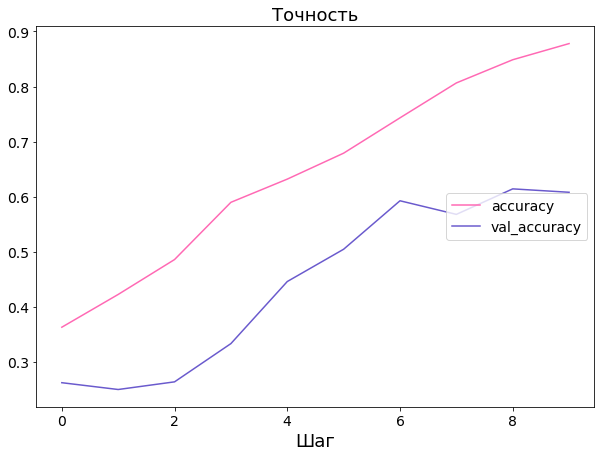

In [36]:
plot_accuracy(history)

In [45]:
test_loss, test_acc = modelB.model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

34/34 - 1s - loss: 1.6413 - accuracy: 0.5537

Test accuracy: 0.5537037253379822
